In [25]:
%matplotlib inline

import corpusToDict as ctd

from nltk.tokenize import word_tokenize
from nltk import ngrams, FreqDist
from nltk.corpus import stopwords

import matplotlib.pyplot as plt
from wordcloud import WordCloud

import numpy as np

read the dataset here:

In [ ]:
# path to the corpus:
filePath = "./Corpus.csv"

corpus = ctd.getCorpus(filePath)

In [ ]:
# find the vocabulary of the corpus, and a large combined string of all the text:
vocabulary = set()
data = ""

for i in range(1, len(corpus)):
    text = corpus[i][0]
    data += text
    tokens = word_tokenize(text)
    
    vocabulary.update(tokens)
    

Perform some basic analysis on the vocablualry now


In [ ]:
print(vocabulary)


In [ ]:
print(len(vocabulary))

### Plot and print the 5 most frequent N-gram sequences of len 2, 3, 4, 5

In [ ]:
allCounts = {}

for size in range(2, 6):
    allCounts[size] = FreqDist(ngrams(data, size))
    

PLotting for ngrmas of desired size 

In [ ]:
for size in [2, 3, 4, 5]:
    grams = allCounts[size].most_common(5)
    sequences = []
    values = []

    # getting the n-gram values and their respective frequencies in their respective lists to plot them:
    for pairs in grams:
        
        string = ""
        for chars in pairs[0]:
            if chars == " ":
                string+= "_"
            else:
                string += chars
        sequences.append(string)
        
        values.append(pairs[1])

    fig = plt.figure(figsize=(10, 5))
    
    # everyone will thank me for this
    plt.style.use('dark_background')
    
    # creating a bar plot
    plt.bar(sequences, values, color="aqua", width=0.4)
    


    plt.xlabel("Ngram Sequence [Spaces replaced with '_']")
    plt.ylabel("Frequency in Corpus")
    plt.title(f"Top 5 {size}-grams in the Corpus")

    plt.show()

Creating Wordclouds for each category: 

In [27]:

# generate word clouds for each category in the corpus

# number of categories in the corpus
nCategories = 5

# store a large combined string of all text per category
textOfCategory = [""] * nCategories


for i in range(1, len(corpus)):
    
    text = corpus[i][0]
    category = int(corpus[i][1])

    textOfCategory[category] += text
    

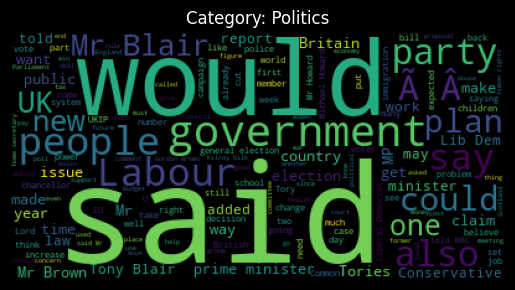

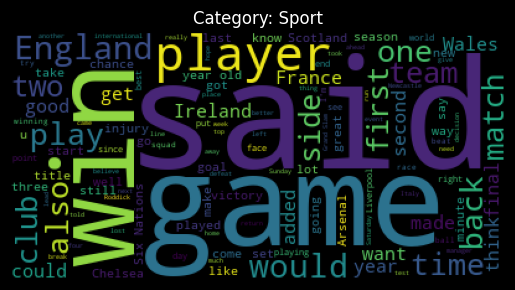

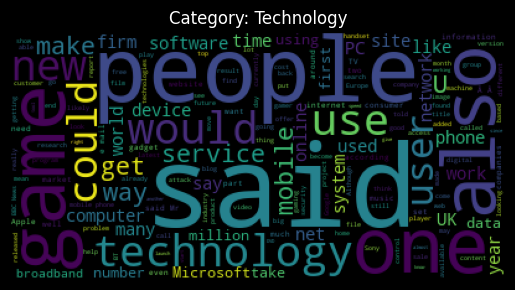

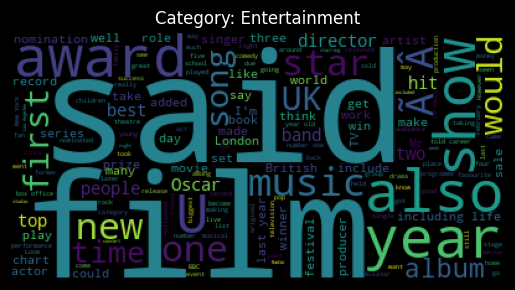

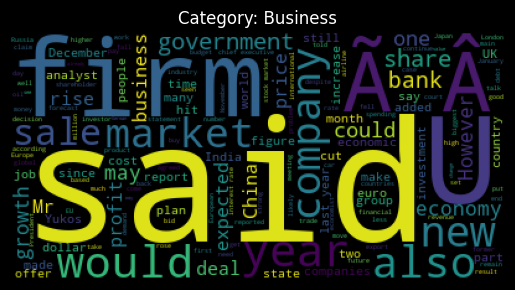

In [34]:

stop_words = set(stopwords.words("english"))

wc = WordCloud(stopwords=stop_words)

labels = {  0: "Politics",
            1: "Sport",
            2: "Technology",
            3: "Entertainment",
            4: "Business"}

for i, text in enumerate(textOfCategory):
    wc.generate(text)
    plt.imshow(wc)
    plt.axis("off")
    plt.title(f"Category: {labels[i]}")
    plt.show()
    